In [1]:
import pandas as pd

obesity = pd.read_csv("/Users/Elaine/Desktop/CDC_Obesity_INCOME.csv")
obesity.head()

,Index,Income,Obesity_Rate,No_Physical_Activity,Low_Fruit,Low_Vegetables
0,1,"$15,000 - $24,999",31.8,30.4,NaN,NaN
1,2,"$25,000 - $34,999",37.5,26.9,NaN,NaN
2,3,"$35,000 - $49,999",37.7,26.1,NaN,NaN
3,4,"$50,000 - $74,999",36.1,20.6,NaN,NaN
4,5,"$75,000 or greater",38.5,14.3,NaN,NaN


In [2]:
obesity.Income.unique()

array(['$15,000 - $24,999', '$25,000 - $34,999', '$35,000 - $49,999',
       '$50,000 - $74,999', '$75,000 or greater'], dtype=object)

In [3]:
income_dict = {"$75,000 or greater": 75000, "$50,000 - $74,999": 50000, 
               "$35,000 - $49,999": 35000, "$25,000 - $34,999": 25000,
               "$15,000 - $24,999": 15000}
obesity["Income"] = obesity.Income.map(income_dict)
obesity.Income.unique()

array([15000, 25000, 35000, 50000, 75000])

In [4]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
Index                   1340 non-null int64
Income                  1340 non-null int64
Obesity_Rate            1340 non-null float64
No_Physical_Activity    1335 non-null float64
Low_Fruit               530 non-null float64
Low_Vegetables          530 non-null float64
dtypes: float64(4), int64(2)
memory usage: 62.9 KB


In [5]:
obesity.dropna(inplace = True)
obesity.shape

(530, 6)

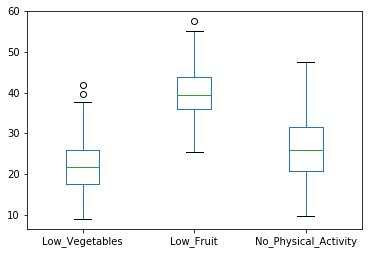

In [28]:
obesity[["Low_Vegetables", "Low_Fruit", "No_Physical_Activity"]].plot(kind = "box")

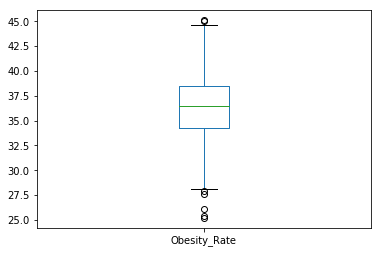

In [7]:
obesity[["Obesity_Rate"]].plot(kind = "box")

In [29]:
obesity.Obesity_Rate.mean()

36.34905660377353

In [32]:
obesity.describe()

,Index,Income,Obesity_Rate,No_Physical_Activity,Low_Fruit,Low_Vegetables
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,667.198113,40000.000000,36.349057,26.046604,39.991132,21.929057
std,386.629916,20995.993857,3.088929,7.621026,5.806112,5.820879
min,6.000000,15000.000000,25.200000,9.700000,25.500000,9.000000
25%,333.250000,25000.000000,34.300000,20.725000,36.025000,17.700000
50%,665.500000,35000.000000,36.500000,25.950000,39.400000,21.750000
75%,997.750000,50000.000000,38.475000,31.600000,43.900000,25.875000
max,1335.000000,75000.000000,45.100000,47.600000,57.500000,41.800000


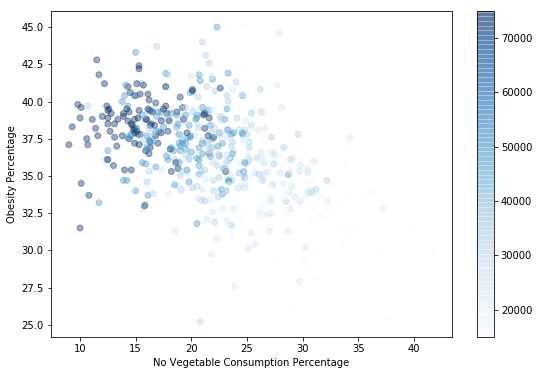

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.scatter(x = obesity.Low_Vegetables, y = obesity.Obesity_Rate,
            c= obesity.Income, cmap="Blues", alpha=.4)
plt.xlabel("No Vegetable Consumption Percentage")
plt.ylabel("Obesity Percentage")
plt.colorbar();

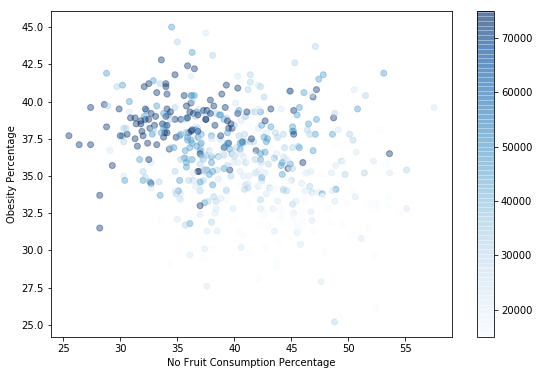

In [9]:
plt.figure(figsize=(9, 6))
plt.scatter(x = obesity.Low_Fruit, y = obesity.Obesity_Rate,
            c= obesity.Income, cmap="Blues", alpha=.4)
plt.xlabel("No Fruit Consumption Percentage")
plt.ylabel("Obesity Percentage")
plt.colorbar();

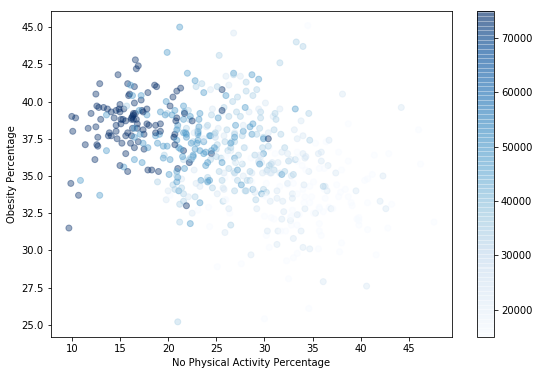

In [10]:
plt.figure(figsize=(9, 6))
plt.scatter(x = obesity.No_Physical_Activity, y = obesity.Obesity_Rate,
            c= obesity.Income, cmap="Blues", alpha=.4)
plt.xlabel("No Physical Activity Percentage")
plt.ylabel("Obesity Percentage")
plt.colorbar();

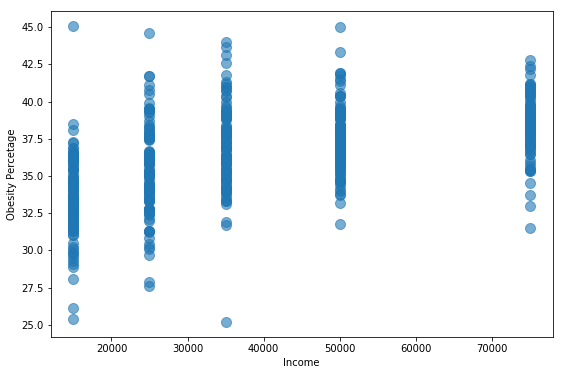

In [11]:
plt.figure(figsize=(9, 6))
plt.scatter(x = obesity.Income, y = obesity.Obesity_Rate, alpha=.6, s= 100)
plt.xlabel("Income")
plt.ylabel("Obesity Percetage");

In [12]:
obesity.corr().loc["Obesity_Rate"].sort_values()

Low_Vegetables         -0.510135
No_Physical_Activity   -0.437579
Low_Fruit              -0.304367
Index                   0.012625
Income                  0.522074
Obesity_Rate            1.000000
Name: Obesity_Rate, dtype: float64

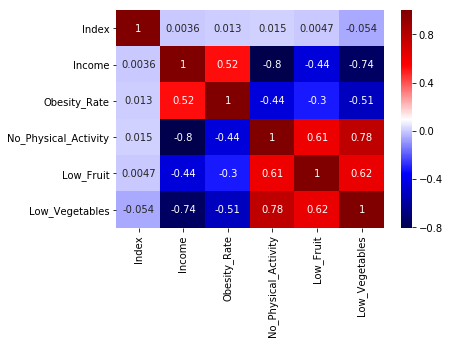

In [13]:
import seaborn as sns

sns.heatmap(obesity.corr(), cmap = "seismic", annot= True);

In [14]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Obesity_Rate ~ Income + Low_Fruit + No_Physical_Activity + Low_Vegetables', data=obesity).fit()
lm.params

Intercept               36.793989
Income                   0.000056
Low_Fruit               -0.009398
No_Physical_Activity     0.050367
Low_Vegetables          -0.165570
dtype: float64

In [15]:
lm.pvalues

Intercept               4.886619e-123
Income                   1.076793e-08
Low_Fruit                7.194896e-01
No_Physical_Activity     8.805323e-02
Low_Vegetables           2.286646e-06
dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['Income','Low_Vegetables','No_Physical_Activity', 'Low_Fruit']
X = obesity[feature_cols]
y = obesity.Obesity_Rate

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score

#Make train test split 70/30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 3)

#Fit model on training data and apply it on both training and testing data
#Intialize model
lr = LinearRegression()
lr.fit(X_train, y_train)

#Test model on training data
train_score = lr.score(X_train, y_train)
print ("Training R2 score is {}".format(train_score))
#Test model on testing data
test_score = lr.score(X_test, y_test)
print ("Testing R2 score is {}".format(test_score))

Training R2 score is 0.2884484385214705
Testing R2 score is 0.33885098930671664


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(0, 0.5, 'Cross Validated R2 Score')

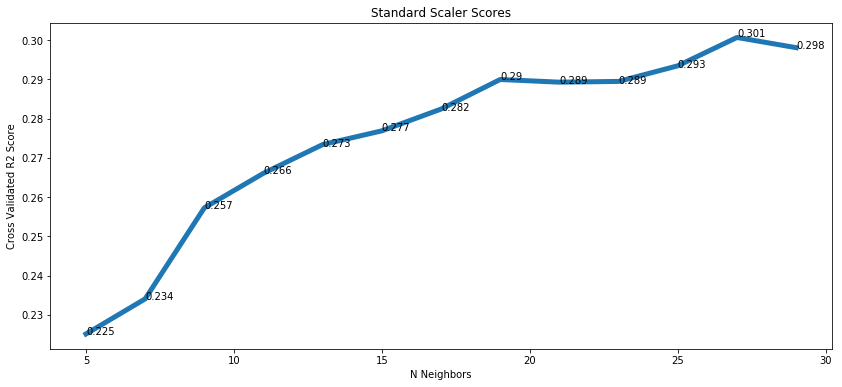

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Intialize scalers and fit & transform
ss = StandardScaler()
X_ss = ss.fit_transform(X)

#Make data frames from scaled data. Use columns from X
X_ss = pd.DataFrame(X_ss, columns=X.columns)
X_ss.head()

neighbors = range(5, 30, 2)
#Intialize list with cross validated scores
cv_scores = []

for i in neighbors:
    #Fit model with i
    model = KNeighborsRegressor(n_neighbors=i)
    cv = cross_val_score(model, X_ss, y, cv =5 , scoring="r2").mean()
    #Append cv_score to cv_scores_ss
    cv_scores.append(cv)
    
#Plot line plot of neighbors vs cv_scores
plt.figure(figsize=(14, 6))
plt.plot(neighbors, cv_scores, linewidth = 5)
for i in range(len(neighbors)):
    s = round(cv_scores[i], 3)
    n = neighbors[i]
    plt.annotate(str(s), xy = (n, s))
plt.title("Standard Scaler Scores")
plt.xlabel("N Neighbors")
plt.ylabel("Cross Validated R2 Score")
    

Text(0, 0.5, 'Cross Validated R2 Score')

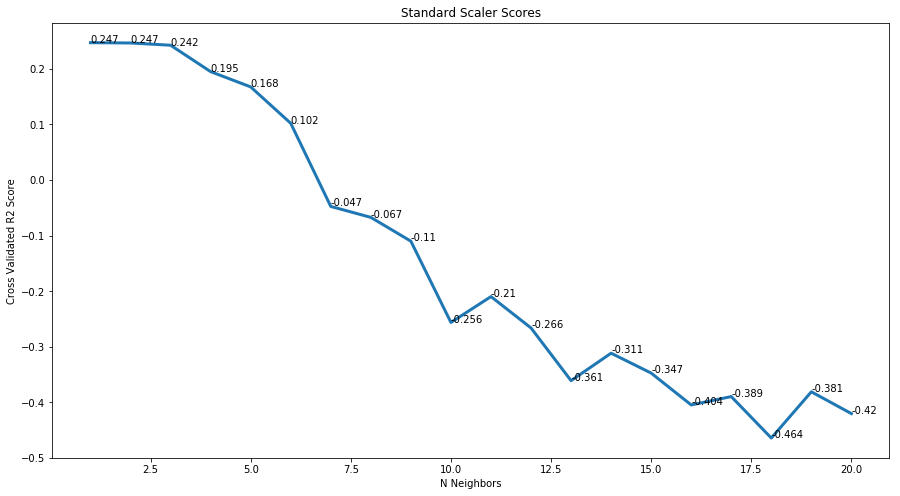

In [34]:
from sklearn.tree import DecisionTreeRegressor

depths = range(1, 21)
cv_scores = []

for i in depths:
    cv = cross_val_score(DecisionTreeRegressor(max_depth=i), X, y, cv =5, scoring="r2").mean()
    cv_scores.append(cv)
    
plt.figure(figsize=(15, 8))
plt.plot(depths, cv_scores, linewidth = 3)
plt.xlabel("Max Depth Values")
plt.ylabel("Average Cross Validated Accuracy");
for i in range(len(depths)):
    s = round(cv_scores[i], 3)
    d = depths[i]
    plt.annotate(str(s), xy = (d, s))
plt.title("Standard Scaler Scores")
plt.xlabel("N Neighbors")
plt.ylabel("Cross Validated R2 Score")

In [27]:
DT_obesity_model = DecisionTreeRegressor(max_depth=3)
DT_obesity_model.fit(X, y)

print(dict(zip(X.columns, DT_obesity_model.feature_importances_)))

#cv = cross_val_score(DT_obesity_model, X1, y1, cv =5, scoring="r2") - test on new data set

{'Income': 0.8009683478378447, 'Low_Vegetables': 0.1667205411711661, 'No_Physical_Activity': 0.03231111099098933, 'Low_Fruit': 0.0}


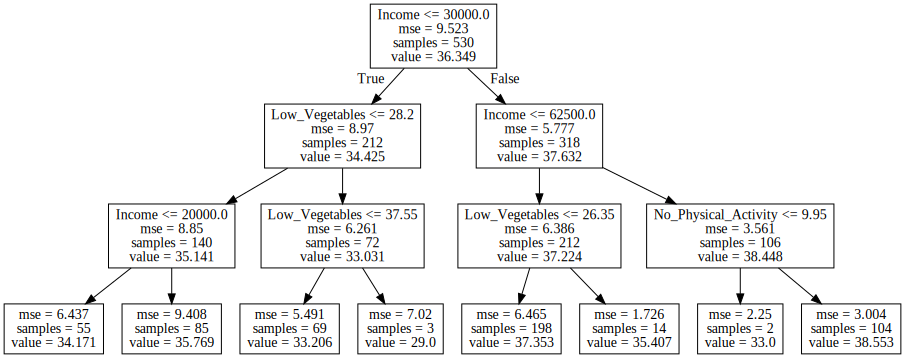

In [27]:
#imports - WHY WON'T THIS WORK??
from sklearn.tree import export_graphviz
import graphviz

#Export the decision tree graph viz object. We have to export and the re-import it
export_graphviz(obesity_model, out_file='obesity.dot', 
                    feature_names=X.columns)
with open("obesity.dot") as f: 
        dot_graph = f.read()
graphviz.Source(dot_graph)

#class_names=y.unique() is for classification

Text(0, 0.5, 'Cross Validated R2 Score')

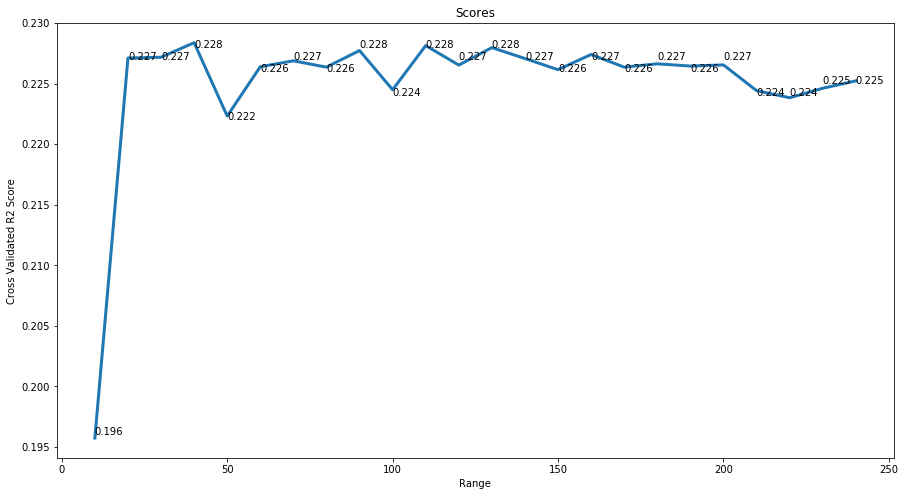

In [35]:
from sklearn.ensemble import RandomForestRegressor

# list of values to try for n_estimators
estimator_range = range(10, 250, 10)

cv_scores = []

for estimator in estimator_range:
    rfr = RandomForestRegressor(n_estimators=estimator, random_state=1)
    cv = cross_val_score(rfr, X, y, cv=5, scoring='r2').mean()
    cv_scores.append(cv)
    
plt.figure(figsize=(15, 8))
plt.plot(estimator_range, cv_scores, linewidth = 3)
plt.xlabel("Range")
plt.ylabel("Average Cross R2 Accuracy");
for i in range(len(estimator_range)):
    s = round(cv_scores[i], 3)
    r = estimator_range[i]
    plt.annotate(str(s), xy = (r, s))
plt.title("Scores")
plt.xlabel("Range")
plt.ylabel("Cross Validated R2 Score")

Text(0, 0.5, 'Cross Validated Accuracy Score')

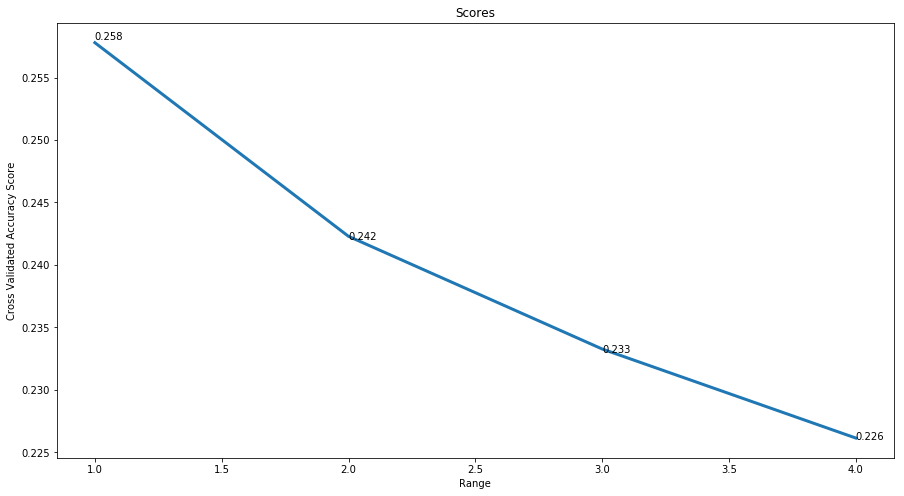

In [22]:
feature_range = range(1, len(feature_cols)+1)
cv_scores = []

for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=150, max_features=feature, random_state=1)
    cv = cross_val_score(rfreg, X, y, cv=5, scoring='r2').mean()
    cv_scores.append(cv)
    
plt.figure(figsize=(15, 8))
plt.plot(feature_range, cv_scores, linewidth = 3)
plt.xlabel("Range")
plt.ylabel("Average Cross Validated Accuracy");
for i in range(len(feature_range)):
    s = round(cv_scores[i], 3)
    r = feature_range[i]
    plt.annotate(str(s), xy = (r, s))
plt.title("Scores")
plt.xlabel("Range")
plt.ylabel("Cross Validated Accuracy Score")

In [23]:
# Use the best n_estimators and max_features values
rfr = RandomForestRegressor(n_estimators=40, 
                              max_features=2,
                              oob_score=True,
                              random_state=1)
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=None, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [24]:
#obesity_model = DecisionTreeRegressor(max_depth=3)
#obesity_model.fit(X, y)
#HOW DO I SELECT AND SAVE A MODEL??

obesity_model = LinearRegression()
obesity_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)